Done on Kaggle (but not running) : [Kagggle Link](https://www.kaggle.com/code/abhishekchaudhary846/blood-cell-type-prediction/edit)

Idea: Use various models from keras and then do ensemple on CV data and then test on test set.

In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import numpy as np
# Most Recent One
# !pip install git+https://github.com/rcmalli/keras-squeezenet.git
# # Release Version
# !pip install keras_squeezenet
!pip install keras_applications
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-squeezenet.git to /tmp/pip-req-build-6lsk44vt
  Running command git clone -q https://github.com/rcmalli/keras-squeezenet.git /tmp/pip-req-build-6lsk44vt
  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-py3-none-any.whl size=4435 sha256=f31cb397e6d98b4991bf61e342e05d8b979c91654398e1e0f9de0a459b945d42
  Stored in directory: /tmp/pip-ephem-wheel-cache-xiw83ofl/wheels/30/c8/6f/e0ccdc0b275ae53ec21e2d65b172dc970202111a7cd5b66c32
Successfully built keras-squeezenet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Squeezenet part

[comment out warning from git line ](https://github.com/rcmalli/keras-squeezenet/issues/24)

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from keras_applications.imagenet_utils import _obtain_input_shape
# from tensorflow.keras.applications.imagenet_utils import _obtain_input_shape
# from keras_squeezenet import SqueezeNet
# from tf.keras.applications.imagenet_utils import preprocess_input, decode_predictions
# from keras.preprocessing import image

# model = SqueezeNet()

# img = image.load_img('/content/drive/MyDrive/AIMIA_Project/cat.jpeg', target_size=(227, 227))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# preds = model.predict(x)
# print('Predicted:', decode_predictions(preds))

ImportError: ignored

# MobileNet V2

In [ ]:
import tensorflow as tf
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

In [ ]:
# import tensorflow as tf
# pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights='imagenet',
#     pooling='avg'
# )

In [ ]:
pretrained_model.trainable = False

In [ ]:
train_dir = '/content/drive/MyDrive/AIMIA_Project/Data/blood cell data/dataset2-master/dataset2-master/images/TRAIN'
test_dir = '/content/drive/MyDrive/AIMIA_Project/Data/blood cell data/dataset2-master/dataset2-master/images/TEST'

In [ ]:
# Create generators

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
# Flow image data

train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [ ]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
249/249 [==============================] - 1657s 7s/step - loss: 0.8306 - accuracy: 0.6564 - val_loss: 0.5568 - val_accuracy: 0.7858
Epoch 2/100
249/249 [==============================] - 355s 1s/step - loss: 0.4729 - accuracy: 0.8161 - val_loss: 0.5445 - val_accuracy: 0.7778
Epoch 3/100
249/249 [==============================] - 369s 1s/step - loss: 0.3591 - accuracy: 0.8631 - val_loss: 0.3507 - val_accuracy: 0.8653
Epoch 4/100
249/249 [==============================] - 358s 1s/step - loss: 0.2845 - accuracy: 0.8945 - val_loss: 0.3276 - val_accuracy: 0.8673
Epoch 5/100
249/249 [==============================] - 352s 1s/step - loss: 0.2252 - accuracy: 0.9177 - val_loss: 0.2645 - val_accuracy: 0.9005
Epoch 6/100
249/249 [==============================] - 362s 1s/step - loss: 0.1776 - accuracy: 0.9384 - val_loss: 0.2527 - val_accuracy: 0.9025
Epoch 7/100
249/249 [==============================] - 354s 1s/step - loss: 0.1634 - accuracy: 0.9390 - val_loss: 0.3325 - val_accuracy

In [ ]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss Over Time"
)

fig.show()

RESULTS:

In [ ]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

78/78 [==============================] - 560s 7s/step
Test Accuracy: 50.422%


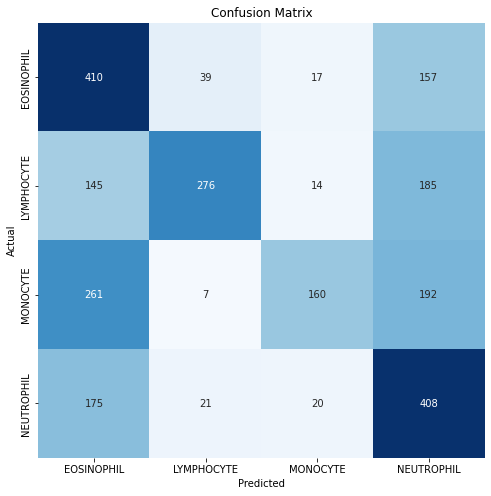

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.41      0.66      0.51       623
  LYMPHOCYTE       0.80      0.45      0.57       620
    MONOCYTE       0.76      0.26      0.39       620
  NEUTROPHIL       0.43      0.65      0.52       624

    accuracy                           0.50      2487
   macro avg       0.60      0.50      0.50      2487
weighted avg       0.60      0.50      0.50      2487



In [ ]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 1989 images belonging to 4 classes.
63/63 [==============================] - 72s 1s/step
Validation Accuracy: 93.263%


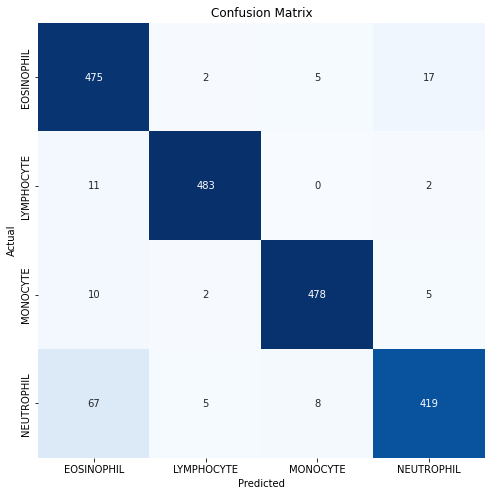

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.84      0.95      0.89       499
  LYMPHOCYTE       0.98      0.97      0.98       496
    MONOCYTE       0.97      0.97      0.97       495
  NEUTROPHIL       0.95      0.84      0.89       499

    accuracy                           0.93      1989
   macro avg       0.94      0.93      0.93      1989
weighted avg       0.94      0.93      0.93      1989



In [ ]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)


predictions = np.argmax(model.predict(val_images), axis=1)

acc = accuracy_score(val_images.labels, predictions)
cm = tf.math.confusion_matrix(val_images.labels, predictions)
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
# Save the entire model as a SavedModel.
!pip install pyyaml h5py
!mkdir -p saved_model
model.save('saved_model/my_model')
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Using efficient_net (in progress..)

In [ ]:
import tensorflow as tf
pretrained_model1 = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)